In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def polynomial_frame(feature, degree):
    # assume that degree >= 1
    # initialize the frame
    poly_frame = pd.DataFrame()
    poly_frame['power_1'] = feature
    
    if degree > 1:
        # then loop over the remaining degrees
        for power in range(2, degree + 1):
            name = "power_" + str(power)
            poly_frame[name] = np.power(feature, power)
    return poly_frame

In [3]:
sales = pd.read_csv('house_data.csv')

In [4]:
sales = sales.sort_values(['sqft_living', 'price'])

In [5]:
poly1_data = polynomial_frame(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [6]:
poly1_data_features = poly1_data['power_1'].values.reshape(-1,1)
poly1_data_target = poly1_data['price'].values.reshape(-1,1)
regr = linear_model.LinearRegression(fit_intercept=True)
regr.fit(poly1_data_features, poly1_data_target)
regr.predict(poly1_data_features)
print regr.coef_
print regr.intercept_

[[ 280.6235679]]
[-43580.74309447]


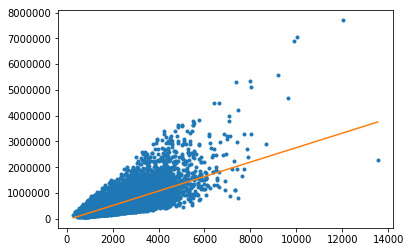

In [7]:
# print regr.predict(poly1_data)
plt.plot(poly1_data_features, poly1_data_target,'.',
        poly1_data_features, regr.predict(poly1_data_features),'-')


In [8]:
poly2_data = polynomial_frame(sales['sqft_living'], 2)
my_features = poly2_data.columns # get the name of the features
print my_features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
poly2_data_features = poly2_data[my_features].values.reshape(-1,2)
poly2_data_target = poly2_data['price'].values.reshape(-1,1)
model2 = linear_model.LinearRegression(fit_intercept=True)
model2.fit(poly2_data_features, poly2_data_target)
print model2.coef_
print model2.intercept_

Index([u'power_1', u'power_2'], dtype='object')
[[  6.79940947e+01   3.85812609e-02]]
[ 199222.27930549]


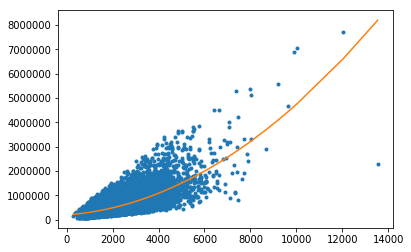

In [9]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data_features),'-')

In [10]:
poly3_data = polynomial_frame(sales['sqft_living'], 3)
my_features = poly3_data.columns # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
poly3_data_features = poly3_data[my_features].values.reshape(-1,3)
poly3_data_target = poly3_data['price'].values.reshape(-1,1)
model3 = linear_model.LinearRegression(fit_intercept=True)
model3.fit(poly3_data_features, poly3_data_target)
print model3.coef_
print model3.intercept_

[[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]]
[ 336819.74822121]


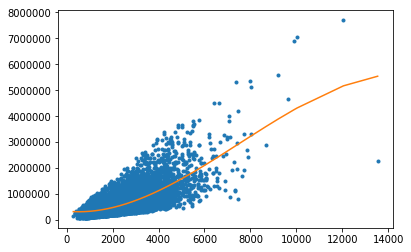

In [11]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data_features),'-')

In [12]:
poly15_data = polynomial_frame(sales['sqft_living'], 15)
my_features = poly15_data.columns # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
poly15_data_features = poly15_data[my_features].values.reshape(-1,15)
poly15_data_target = poly15_data['price'].values.reshape(-1,1)
model15 = linear_model.LinearRegression(fit_intercept=True)
model15.fit(poly15_data_features, poly15_data_target)
print model3.coef_
print model3.intercept_

[[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]]
[ 336819.74822121]


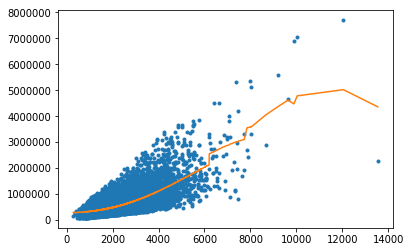

In [13]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data_features),'-')

In [14]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = outcome - predictions
    # Then square and add them up
    residuals_sq = residuals * residuals
    RSS = residuals_sq.sum()

    return(RSS)

In [15]:
traininig_and_validation, testing = train_test_split(sales, test_size = 0.1)
training, validation = train_test_split(traininig_and_validation, test_size = 0.5)

In [17]:
RSS_df = pd.DataFrame(columns=['Degree', 'RSS'])
for degree in range (1,16):
    poly_data = polynomial_frame(training['sqft_living'], degree)
    my_features = poly_data.columns
    poly_data_features = poly_data[my_features].values.reshape(-1, degree)
    validation_features = polynomial_frame(validation['sqft_living'], degree)
    validation_features = validation_features[my_features].values.reshape(-1, degree)
    poly_data['price'] = training['price']
    poly_data_target = poly_data['price'].values.reshape(-1,1)
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(poly_data_features, poly_data_target)
    RSS = get_residual_sum_of_squares(model, validation_features, validation['price'].values.reshape(-1,1))
    RSS_df = RSS_df.append({'Degree': degree,'RSS':RSS}, ignore_index=True)
    print 'Degree: ', degree, model.coef_
    print 'Intercept: ', model.intercept_
print RSS_df
RSS_df = RSS_df.sort_values('RSS')
print RSS_df

Degree:  1 [[ 284.20110565]]
Intercept:  [-51750.17548085]
Degree:  2 [[ 10.10976874   0.0501674 ]]
Intercept:  [ 259379.87337781]
Degree:  3 [[  1.24138969e+01   4.94414194e-02   6.02991588e-08]]
Intercept:  [ 257413.1280311]
Degree:  4 [[ -1.05261953e+02   1.04180160e-01  -9.20627033e-06   4.75541926e-10]]
Intercept:  [ 335285.59005431]
Degree:  5 [[  2.52169740e-05   5.94354973e-02  -2.27681139e-06   1.44695776e-10
    8.74615694e-16]]
Intercept:  [ 259324.72375514]
Degree:  6 [[  2.50916683e-05   5.92110416e-02  -2.21995058e-06   1.41307368e-10
    9.38973620e-16  -3.61137756e-16]]
Intercept:  [ 259941.20287246]
Degree:  7 [[  2.49970867e-05   5.90039868e-02  -2.14782057e-06   1.36412162e-10
    9.92895552e-16  -3.25096019e-16  -1.06896624e-15]]
Intercept:  [ 259591.12305687]
Degree:  8 [[  2.49820193e-05   5.89827964e-02  -2.14082392e-06   1.35970357e-10
    9.96063015e-16  -3.28689801e-16  -1.07198432e-15   9.56047801e-17]]
Intercept:  [ 259599.51128984]
Degree:  9 [[  2.49850555